In [1]:
#install and import required libraries.
from bs4 import BeautifulSoup
import requests
import pandas as pd
import csv
import numpy as np
from time import sleep
from random import randint

In [2]:
page=requests.get("https://www.imdb.com/search/title/?genres=action&sort=user_rating,desc&title_type=feature&num_votes=25000,&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=f11158cc-b50b-4c4d-b0a2-40b32863395b&pf_rd_r=XZ8X52H1R40B7KG5SNZ9&pf_rd_s=right-6&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_gnr_1")

In [3]:
page

<Response [200]>

In [4]:
soup=BeautifulSoup(page.content)
soup

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>Feature Film,
Rating Count at least 25,000,
Action
(Sorted by IMDb Rating Descending) - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.imdb.com/search/title/?title_type=feature&amp;genres=action" rel="canonical"/>
<meta content="http:/

In [5]:
movie_names = []
for movie in soup.find_all("h3", class_="lister-item-header"):
    name = movie.a.text
    movie_names.append(name)

print(movie_names)    

['The Dark Knight', 'The Lord of the Rings: The Return of the King', 'Spider-Man: Across the Spider-Verse', 'Inception', 'The Lord of the Rings: The Fellowship of the Ring', 'The Lord of the Rings: The Two Towers', 'The Matrix', 'Star Wars: Episode V - The Empire Strikes Back', 'Soorarai Pottru', 'Terminator 2: Judgment Day', 'Star Wars', 'Shichinin no samurai', 'Seppuku', 'Sita Ramam', 'Gladiator', 'Léon', 'The Dark Knight Rises', 'Spider-Man: Into the Spider-Verse', 'Raiders of the Lost Ark', 'Avengers: Endgame', 'Aliens', 'Oldeuboi', 'Avengers: Infinity War', 'Kaithi', 'Asuran', 'Top Gun: Maverick', 'Heat', 'Star Wars: Episode VI - Return of the Jedi', 'Mononoke-hime', 'North by Northwest', 'Dangal', 'Kantara', 'K.G.F: Chapter 2', 'Vikram', 'Shershaah', 'Ratsasan', 'Batman Begins', 'Spider-Man: No Way Home', 'Indiana Jones and the Last Crusade', 'Jurassic Park', '1917', 'Kill Bill: Vol. 1', 'Die Hard', 'V for Vendetta', 'Ran', 'Kimetsu no Yaiba: Mugen Ressha-Hen', 'Gangs of Wasseypu

In [6]:
# Lets  Extract data from IMDB site & make a csv file
data = []
for movie in soup.find_all("div", class_="lister-item-content"):
    sno = len(data) + 1
    name = movie.h3.a.text

    # Extract multiple directors and separate them
    director_tags = movie.find("p", class_="").find_all("a")
    directors = [director.text for director in director_tags]
    num_directors = len(directors)

    # If there's only one director, store it directly
    if num_directors == 1:
        director = directors[0]
        director1 = director2 = ""
    # If there are multiple directors, separate them into director1 and director2
    elif num_directors >= 2:
        director1 = directors[0]
        director2 = directors[1]
    else:
        director1 = director2 = ""

    duration = movie.find("span", class_="runtime").text.strip()
    year = movie.find("span", class_="lister-item-year").text.strip("()")
    ratings = float(movie.strong.text)
    metascore_tag = movie.find("span", class_="metascore")
    metascore = int(metascore_tag.text) if metascore_tag else None

    data.append([sno, name, director1, director2, duration, year, ratings, metascore])



In [7]:
# Create a DataFrame and save it as a CSV file
df = pd.DataFrame(data, columns=["Sno", "Movie Name", "Director1", "Director2", "Duration", "Year", "Ratings", "Metascore"])
df.to_csv("movies_data_with_directors.csv", index=False)

print("Data has been scraped and saved as 'movies_data_with_directors.csv'.")

Data has been scraped and saved as 'movies_data_with_directors.csv'.


In [8]:
df

,Sno,Movie Name,Director1,Director2,Duration,Year,Ratings,Metascore
0,1,The Dark Knight,Christopher Nolan,Christian Bale,152 min,2008,9.0,84.0
1,2,The Lord of the Rings: The Return of the King,Peter Jackson,Elijah Wood,201 min,2003,9.0,94.0
2,3,Spider-Man: Across the Spider-Verse,Joaquim Dos Santos,Kemp Powers,140 min,2023,8.9,86.0
3,4,Inception,Christopher Nolan,Leonardo DiCaprio,148 min,2010,8.8,74.0
4,5,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,Elijah Wood,178 min,2001,8.8,92.0
5,6,The Lord of the Rings: The Two Towers,Peter Jackson,Elijah Wood,179 min,2002,8.8,87.0
6,7,The Matrix,Lana Wachowski,Lilly Wachowski,136 min,1999,8.7,73.0
7,8,Star Wars: Episode V - The Empire Strikes Back,Irvin Kershner,Mark Hamill,124 min,1980,8.7,82.0
8,9,Soorarai Pottru,Sudha Kongara,Suriya,153 min,2020,8.7,NaN
9,10,Terminator 2: Judgment Day,James Cameron,Arnold Schwarzenegger,137 min,1991,8.6,75.0


In [9]:
# making second CSV File.


In [10]:
 data = []
for movie in soup.find_all("div", class_="lister-item-content"):
    sno = len(data) + 1
    name = movie.h3.a.text

    # Extract multiple stars and separate them
    stars_tags = movie.find("p", class_="").find_all("a")[1:]
    stars = [star.text for star in stars_tags]
    num_stars = len(stars)

    # If there are stars, separate them into star1, star2, star3, and star4
    star1 = star2 = star3 = star4 = ""
    if num_stars >= 1:
        star1 = stars[0]
    if num_stars >= 2:
        star2 = stars[1]
    if num_stars >= 3:
        star3 = stars[2]
    if num_stars >= 4:
        star4 = stars[3]

    # Extract other movie details
    duration = movie.find("span", class_="runtime").text.strip()
    year = movie.find("span", class_="lister-item-year").text.strip("()")
    ratings = float(movie.strong.text)
    metascore_tag = movie.find("span", class_="metascore")
    metascore = int(metascore_tag.text) if metascore_tag else None

    # Extract multiple genres and separate them
    genre_tags = movie.find("span", class_="genre").text.strip().split(", ")
    genre1 = genre2 = genre3 = ""
    num_genres = len(genre_tags)
    if num_genres >= 1:
        genre1 = genre_tags[0]
    if num_genres >= 2:
        genre2 = genre_tags[1]
    if num_genres >= 3:
        genre3 = genre_tags[2]

    # Additional movie details
    votes_tag = movie.find("span", attrs={"name": "nv"})
    votes = int(votes_tag["data-value"]) if votes_tag else None

    gross_collection_tag = movie.find("span", attrs={"name": "nv"})
    gross_collection = int(gross_collection_tag["data-value"]) if gross_collection_tag else None

    popularity = movie.find("span", class_="lister-item-index").text.strip()

    certification_tag = movie.find("span", class_="certificate")
    certification = certification_tag.text if certification_tag else None

    data.append([sno, name, star1, star2, star3, star4, duration, year, ratings, metascore, votes, genre1, genre2, genre3, gross_collection, popularity, certification])



In [11]:
# Create a DataFrame and save it as a CSV file
df2 = pd.DataFrame(data, columns=["Sno", "Movie Name", "Star1", "Star2", "Star3", "Star4", "Duration", "Year", "Ratings", "Metascore", "Votes", "Genre1", "Genre2", "Genre3", "Gross Collection", "Popularity", "Certification"])
df2.to_csv("movies_data_extended.csv", index=False)

print("Data has been scraped and saved as 'movies_data_extended.csv'.")


Data has been scraped and saved as 'movies_data_extended.csv'.


In [12]:
df2

,Sno,Movie Name,Star1,Star2,Star3,Star4,Duration,Year,Ratings,Metascore,Votes,Genre1,Genre2,Genre3,Gross Collection,Popularity,Certification
0,1,The Dark Knight,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,152 min,2008,9.0,84.0,2753685,Action,Crime,Drama,2753685,1.,UA
1,2,The Lord of the Rings: The Return of the King,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,201 min,2003,9.0,94.0,1903996,Action,Adventure,Drama,1903996,2.,U
2,3,Spider-Man: Across the Spider-Verse,Kemp Powers,Justin K. Thompson,Shameik Moore,Hailee Steinfeld,140 min,2023,8.9,86.0,197616,Animation,Action,Adventure,197616,3.,U
3,4,Inception,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,148 min,2010,8.8,74.0,2444409,Action,Adventure,Sci-Fi,2444409,4.,UA
4,5,The Lord of the Rings: The Fellowship of the Ring,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,178 min,2001,8.8,92.0,1932265,Action,Adventure,Drama,1932265,5.,U
5,6,The Lord of the Rings: The Two Towers,Elijah Wood,Ian McKellen,Viggo Mortensen,Orlando Bloom,179 min,2002,8.8,87.0,1718152,Action,Adventure,Drama,1718152,6.,UA
6,7,The Matrix,Lilly Wachowski,Keanu Reeves,Laurence Fishburne,Carrie-Anne Moss,136 min,1999,8.7,73.0,1976406,Action,Sci-Fi,,1976406,7.,A
7,8,Star Wars: Episode V - The Empire Strikes Back,Mark Hamill,Harrison Ford,Carrie Fisher,Billy Dee Williams,124 min,1980,8.7,82.0,1333220,Action,Adventure,Fantasy,1333220,8.,UA
8,9,Soorarai Pottru,Suriya,Paresh Rawal,Aparna Balamurali,Urvashi,153 min,2020,8.7,NaN,120196,Action,Drama,,120196,9.,U
9,10,Terminator 2: Judgment Day,Arnold Schwarzenegger,Linda Hamilton,Edward Furlong,Robert Patrick,137 min,1991,8.6,75.0,1134024,Action,Sci-Fi,,1134024,10.,A


# Phase 2 Table1

In [13]:
# Connect to the SQLite database
import sqlite3


In [14]:
# Read data from the first CSV into DataFrame
df_movies = pd.read_csv("movies_data_with_directors.csv")

# Read data from the second CSV into DataFrame
df_movies_info = pd.read_csv("movies_data_extended.csv")


In [15]:
# Perform a left join on the common column "MovieName"
merged_df = pd.merge(df_movies, df_movies_info, on="Movie Name", how="left")

In [16]:
merged_df

,Sno_x,Movie Name,Director1,Director2,Duration_x,Year_x,Ratings_x,Metascore_x,Sno_y,Star1,...,Year_y,Ratings_y,Metascore_y,Votes,Genre1,Genre2,Genre3,Gross Collection,Popularity,Certification
0,1,The Dark Knight,Christopher Nolan,Christian Bale,152 min,2008,9.0,84.0,1,Christian Bale,...,2008,9.0,84.0,2753685,Action,Crime,Drama,2753685,1.0,UA
1,2,The Lord of the Rings: The Return of the King,Peter Jackson,Elijah Wood,201 min,2003,9.0,94.0,2,Elijah Wood,...,2003,9.0,94.0,1903996,Action,Adventure,Drama,1903996,2.0,U
2,3,Spider-Man: Across the Spider-Verse,Joaquim Dos Santos,Kemp Powers,140 min,2023,8.9,86.0,3,Kemp Powers,...,2023,8.9,86.0,197616,Animation,Action,Adventure,197616,3.0,U
3,4,Inception,Christopher Nolan,Leonardo DiCaprio,148 min,2010,8.8,74.0,4,Leonardo DiCaprio,...,2010,8.8,74.0,2444409,Action,Adventure,Sci-Fi,2444409,4.0,UA
4,5,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,Elijah Wood,178 min,2001,8.8,92.0,5,Elijah Wood,...,2001,8.8,92.0,1932265,Action,Adventure,Drama,1932265,5.0,U
5,6,The Lord of the Rings: The Two Towers,Peter Jackson,Elijah Wood,179 min,2002,8.8,87.0,6,Elijah Wood,...,2002,8.8,87.0,1718152,Action,Adventure,Drama,1718152,6.0,UA
6,7,The Matrix,Lana Wachowski,Lilly Wachowski,136 min,1999,8.7,73.0,7,Lilly Wachowski,...,1999,8.7,73.0,1976406,Action,Sci-Fi,NaN,1976406,7.0,A
7,8,Star Wars: Episode V - The Empire Strikes Back,Irvin Kershner,Mark Hamill,124 min,1980,8.7,82.0,8,Mark Hamill,...,1980,8.7,82.0,1333220,Action,Adventure,Fantasy,1333220,8.0,UA
8,9,Soorarai Pottru,Sudha Kongara,Suriya,153 min,2020,8.7,NaN,9,Suriya,...,2020,8.7,NaN,120196,Action,Drama,NaN,120196,9.0,U
9,10,Terminator 2: Judgment Day,James Cameron,Arnold Schwarzenegger,137 min,1991,8.6,75.0,10,Arnold Schwarzenegger,...,1991,8.6,75.0,1134024,Action,Sci-Fi,NaN,1134024,10.0,A


In [17]:
merged_df['Director'] = merged_df['Director1'] + ', ' + merged_df['Director2']

In [18]:
merged_df['Genre'] = merged_df['Genre1'] + ', ' + merged_df['Genre2']

In [19]:
selected_columns = merged_df[['Sno_x', 'Movie Name', 'Director', 'Duration_x', 'Genre', 'Ratings_x']]

In [20]:
selected_columns

,Sno_x,Movie Name,Director,Duration_x,Genre,Ratings_x
0,1,The Dark Knight,"Christopher Nolan, Christian Bale",152 min,"Action, Crime",9.0
1,2,The Lord of the Rings: The Return of the King,"Peter Jackson, Elijah Wood",201 min,"Action, Adventure",9.0
2,3,Spider-Man: Across the Spider-Verse,"Joaquim Dos Santos, Kemp Powers",140 min,"Animation, Action",8.9
3,4,Inception,"Christopher Nolan, Leonardo DiCaprio",148 min,"Action, Adventure",8.8
4,5,The Lord of the Rings: The Fellowship of the Ring,"Peter Jackson, Elijah Wood",178 min,"Action, Adventure",8.8
5,6,The Lord of the Rings: The Two Towers,"Peter Jackson, Elijah Wood",179 min,"Action, Adventure",8.8
6,7,The Matrix,"Lana Wachowski, Lilly Wachowski",136 min,"Action, Sci-Fi",8.7
7,8,Star Wars: Episode V - The Empire Strikes Back,"Irvin Kershner, Mark Hamill",124 min,"Action, Adventure",8.7
8,9,Soorarai Pottru,"Sudha Kongara, Suriya",153 min,"Action, Drama",8.7
9,10,Terminator 2: Judgment Day,"James Cameron, Arnold Schwarzenegger",137 min,"Action, Sci-Fi",8.6


In [21]:
# Save the selected columns to a new CSV file
selected_columns.to_csv("selected_columns.csv", index=False)

In [22]:
conn = sqlite3.connect('Movies1_database.db')  
cursor = conn.cursor()

In [23]:
# Create the table with 6 columns
create_table_query = '''
    CREATE TABLE IF NOT EXISTS Movies (
        Sno INTEGER,
        MovieName TEXT,
        Director TEXT,
        Duration INTEGER,
        Genre TEXT,
        Ratings REAL
    );
'''

In [24]:
cursor.execute(create_table_query)

In [25]:
# Iterate through the DataFrame and insert rows into the table
for index, row in selected_columns.iterrows():
    # Use INSERT OR IGNORE to skip rows with duplicate 'Sno' values
    insert_query = "INSERT OR IGNORE INTO Movies (Sno, MovieName, DirectorName, Duration, Genre, Ratings) VALUES (?, ?, ?, ?, ?, ?)"
    cursor.execute(insert_query, (row['Sno_x'], row['Movie Name'], row['Director'], row['Duration_x'], row['Genre'], row['Ratings_x']))

# Commit the changes and close the connection
conn.commit()

In [26]:
# Query the 'Movies' table to retrieve all data
cursor.execute('SELECT * FROM Movies')

# Fetch all rows from the query result
rows = cursor.fetchall()

# Print the table contents
for row in rows:
    print(row)


(1, 'The Dark Knight', 'Christopher Nolan, Christian Bale', '152 min', 'Action, Crime', 9.0)
(2, 'The Lord of the Rings: The Return of the King', 'Peter Jackson, Elijah Wood', '201 min', 'Action, Adventure', 9.0)
(3, 'Spider-Man: Across the Spider-Verse', 'Joaquim Dos Santos, Kemp Powers', '140 min', 'Animation, Action', 8.9)
(4, 'Inception', 'Christopher Nolan, Leonardo DiCaprio', '148 min', 'Action, Adventure', 8.8)
(5, 'The Lord of the Rings: The Fellowship of the Ring', 'Peter Jackson, Elijah Wood', '178 min', 'Action, Adventure', 8.8)
(6, 'The Lord of the Rings: The Two Towers', 'Peter Jackson, Elijah Wood', '179 min', 'Action, Adventure', 8.8)
(7, 'The Matrix', 'Lana Wachowski, Lilly Wachowski', '136 min', 'Action, Sci-Fi', 8.7)
(8, 'Star Wars: Episode V - The Empire Strikes Back', 'Irvin Kershner, Mark Hamill', '124 min', 'Action, Adventure', 8.7)
(9, 'Soorarai Pottru', 'Sudha Kongara, Suriya', '153 min', 'Action, Drama', 8.7)
(10, 'Terminator 2: Judgment Day', 'James Cameron, A

In [27]:
# Query 1: Display all the details of movies created by directors Christopher and Matt Reeves
query1 = "SELECT * FROM Movies WHERE DirectorName IN ('Christopher Nolan', 'Matt Reeves')"
cursor.execute(query1)
result1 = cursor.fetchall()

# Print the results of the queries
print("Query 1: Movies by directors Christopher and Matt Reeves")
for row in result1:
    print(row)


Query 1: Movies by directors Christopher and Matt Reeves


In [28]:
# Query 2: Display all the details of movies with a duration of 140 minutes to 190 minutes
query2 = "SELECT * FROM Movies WHERE Duration BETWEEN '140 min' AND '190 min'"
cursor.execute(query2)
result2 = cursor.fetchall()


In [29]:
print("\nQuery 2: Movies with a duration of 140 minutes to 190 minutes")
for row in result2:
    print(row)


Query 2: Movies with a duration of 140 minutes to 190 minutes
(1, 'The Dark Knight', 'Christopher Nolan, Christian Bale', '152 min', 'Action, Crime', 9.0)
(3, 'Spider-Man: Across the Spider-Verse', 'Joaquim Dos Santos, Kemp Powers', '140 min', 'Animation, Action', 8.9)
(4, 'Inception', 'Christopher Nolan, Leonardo DiCaprio', '148 min', 'Action, Adventure', 8.8)
(5, 'The Lord of the Rings: The Fellowship of the Ring', 'Peter Jackson, Elijah Wood', '178 min', 'Action, Adventure', 8.8)
(6, 'The Lord of the Rings: The Two Towers', 'Peter Jackson, Elijah Wood', '179 min', 'Action, Adventure', 8.8)
(9, 'Soorarai Pottru', 'Sudha Kongara, Suriya', '153 min', 'Action, Drama', 8.7)
(14, 'Sita Ramam', 'Hanu Raghavapudi, Dulquer Salmaan', '163 min', 'Action, Drama', 8.6)
(15, 'Gladiator', 'Ridley Scott, Russell Crowe', '155 min', 'Action, Adventure', 8.5)
(17, 'The Dark Knight Rises', 'Christopher Nolan, Christian Bale', '164 min', 'Action, Drama', 8.4)
(20, 'Avengers: Endgame', 'Anthony Russo, J

In [30]:
# Query 3: Display all details of movies with ratings above 7 in ascending order
query3 = "SELECT * FROM Movies WHERE Ratings > 7 ORDER BY Ratings ASC"
cursor.execute(query3)
result3 = cursor.fetchall()

In [31]:
print("\nQuery 3: Movies with ratings above 7 in ascending order")
for row in result3:
    print(row)


Query 3: Movies with ratings above 7 in ascending order
(37, 'Batman Begins', 'Christopher Nolan, Christian Bale', '140 min', 'Action, Crime', 8.2)
(38, 'Spider-Man: No Way Home', 'Jon Watts, Tom Holland', '148 min', 'Action, Adventure', 8.2)
(39, 'Indiana Jones and the Last Crusade', 'Steven Spielberg, Harrison Ford', '127 min', 'Action, Adventure', 8.2)
(40, 'Jurassic Park', 'Steven Spielberg, Sam Neill', '127 min', 'Action, Adventure', 8.2)
(41, '1917', 'Sam Mendes, Dean-Charles Chapman', '119 min', 'Action, Drama', 8.2)
(42, 'Kill Bill: Vol. 1', 'Quentin Tarantino, Uma Thurman', '111 min', 'Action, Crime', 8.2)
(43, 'Die Hard', 'John McTiernan, Bruce Willis', '132 min', 'Action, Thriller', 8.2)
(44, 'V for Vendetta', 'James McTeigue, Hugo Weaving', '132 min', 'Action, Drama', 8.2)
(45, 'Ran', 'Akira Kurosawa, Tatsuya Nakadai', '162 min', 'Action, Drama', 8.2)
(46, 'Kimetsu no Yaiba: Mugen Ressha-Hen', 'Haruo Sotozaki, Natsuki Hanae', '117 min', 'Animation, Action', 8.2)
(47, 'Gang

In [32]:
# Query 4: Display all movie names in descending order
query4 = "SELECT MovieName FROM Movies ORDER BY MovieName DESC"
cursor.execute(query4)
result4 = cursor.fetchall()

In [33]:
print("\nQuery 4: Movie names in descending order")
for row in result4:
    print(row[0])  # Only print the movie name



Query 4: Movie names in descending order
Yôjinbô
Vikram
V for Vendetta
Top Gun: Maverick
The Matrix
The Lord of the Rings: The Two Towers
The Lord of the Rings: The Return of the King
The Lord of the Rings: The Fellowship of the Ring
The Dark Knight Rises
The Dark Knight
Terminator 2: Judgment Day
Star Wars: Episode VI - Return of the Jedi
Star Wars: Episode V - The Empire Strikes Back
Star Wars
Spider-Man: No Way Home
Spider-Man: Into the Spider-Verse
Spider-Man: Across the Spider-Verse
Soorarai Pottru
Sita Ramam
Shichinin no samurai
Shershaah
Seppuku
Ratsasan
Ran
Raiders of the Lost Ark
Oldeuboi
North by Northwest
Mononoke-hime
Léon
Kimetsu no Yaiba: Mugen Ressha-Hen
Kill Bill: Vol. 1
Kantara
Kaithi
K.G.F: Chapter 2
K.G.F: Chapter 1
Jurassic Park
Indiana Jones and the Last Crusade
Inception
Heat
Gladiator
Gangs of Wasseypur
Die Hard
Dangal
Batman Begins
Baahubali 2: The Conclusion
Avengers: Infinity War
Avengers: Endgame
Asuran
Aliens
1917


In [34]:
# Query 5: Display movie names starting with 'P' and rating greater than 7
query5 = "SELECT * FROM Movies WHERE MovieName LIKE 'P%' AND Ratings > 7"
cursor.execute(query5)
result5 = cursor.fetchall()


In [35]:
print("\nQuery 5: Movie names starting with 'P' and rating greater than 7")
for row in result5:
    print(row[1])  # Only print the movie name




Query 5: Movie names starting with 'P' and rating greater than 7


#  Creating Table 2

In [36]:
df_movies_info

,Sno,Movie Name,Star1,Star2,Star3,Star4,Duration,Year,Ratings,Metascore,Votes,Genre1,Genre2,Genre3,Gross Collection,Popularity,Certification
0,1,The Dark Knight,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,152 min,2008,9.0,84.0,2753685,Action,Crime,Drama,2753685,1.0,UA
1,2,The Lord of the Rings: The Return of the King,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,201 min,2003,9.0,94.0,1903996,Action,Adventure,Drama,1903996,2.0,U
2,3,Spider-Man: Across the Spider-Verse,Kemp Powers,Justin K. Thompson,Shameik Moore,Hailee Steinfeld,140 min,2023,8.9,86.0,197616,Animation,Action,Adventure,197616,3.0,U
3,4,Inception,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,148 min,2010,8.8,74.0,2444409,Action,Adventure,Sci-Fi,2444409,4.0,UA
4,5,The Lord of the Rings: The Fellowship of the Ring,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,178 min,2001,8.8,92.0,1932265,Action,Adventure,Drama,1932265,5.0,U
5,6,The Lord of the Rings: The Two Towers,Elijah Wood,Ian McKellen,Viggo Mortensen,Orlando Bloom,179 min,2002,8.8,87.0,1718152,Action,Adventure,Drama,1718152,6.0,UA
6,7,The Matrix,Lilly Wachowski,Keanu Reeves,Laurence Fishburne,Carrie-Anne Moss,136 min,1999,8.7,73.0,1976406,Action,Sci-Fi,NaN,1976406,7.0,A
7,8,Star Wars: Episode V - The Empire Strikes Back,Mark Hamill,Harrison Ford,Carrie Fisher,Billy Dee Williams,124 min,1980,8.7,82.0,1333220,Action,Adventure,Fantasy,1333220,8.0,UA
8,9,Soorarai Pottru,Suriya,Paresh Rawal,Aparna Balamurali,Urvashi,153 min,2020,8.7,NaN,120196,Action,Drama,NaN,120196,9.0,U
9,10,Terminator 2: Judgment Day,Arnold Schwarzenegger,Linda Hamilton,Edward Furlong,Robert Patrick,137 min,1991,8.6,75.0,1134024,Action,Sci-Fi,NaN,1134024,10.0,A


In [37]:
df_movies_info['Star'] = df_movies_info['Star1'] + ', ' + df_movies_info['Star2']+ ', ' + df_movies_info['Star3']

In [38]:
df_movies_info['Genre'] = df_movies_info['Genre1'] + ', ' + df_movies_info['Genre2']+ ', ' + df_movies_info['Genre3']

In [39]:
selected_columns1 = df_movies_info[['Star', 'Movie Name', 'Votes', 'Gross Collection', 'Genre', 'Popularity','Certification']]

In [40]:
selected_columns1.head(2)

,Star,Movie Name,Votes,Gross Collection,Genre,Popularity,Certification
0,"Christian Bale, Heath Ledger, Aaron Eckhart",The Dark Knight,2753685,2753685,"Action, Crime, Drama",1.0,UA
1,"Elijah Wood, Viggo Mortensen, Ian McKellen",The Lord of the Rings: The Return of the King,1903996,1903996,"Action, Adventure, Drama",2.0,U


In [41]:
# Save the selected columns to a new CSV file
selected_columns1.to_csv("selected_columns1.csv", index=False)

In [42]:
conn = sqlite3.connect('Movies1_database.db')  
cursor = conn.cursor()

In [43]:
# Create Table 2: MoviesExtended
cursor.execute('''
CREATE TABLE IF NOT EXISTS MoviesExtended (
    MovieName TEXT,
    Stars TEXT,
    Votes INTEGER,
    Genre TEXT,
    GrossCollection TEXT,
    Popularity TEXT,
    Certification TEXT
)
''')


In [44]:
cursor.execute(create_table_query)

In [45]:
# Iterate through the DataFrame and insert rows into the table
for index, row in selected_columns1.iterrows():
    insert_query = "INSERT OR IGNORE INTO MoviesExtended (Stars, MovieName, Votes, GrossCollection, Genre, Popularity,Certification) VALUES (?, ?, ?,?, ?, ?, ?)"
    cursor.execute(insert_query, (row['Star'], row['Movie Name'], row['Votes'], row['Gross Collection'], row['Genre'], row['Popularity'], row['Certification']))

# Commit the changes and close the connection
conn.commit()

In [46]:
# Query the 'MoviesExtended' table to retrieve all data
cursor.execute('SELECT * FROM MoviesExtended')

# Fetch all rows from the query result
rows = cursor.fetchall()

# Print the table contents
for row in rows:
    print(row)


('The Dark Knight', 'Christian Bale, Heath Ledger, Aaron Eckhart', 2752233, 'Action, Crime, Drama', '2752233', '1.0', 'UA')
('The Lord of the Rings: The Return of the King', 'Elijah Wood, Viggo Mortensen, Ian McKellen', 1903395, 'Action, Adventure, Drama', '1903395', '2.0', 'U')
('Spider-Man: Across the Spider-Verse', 'Kemp Powers, Justin K. Thompson, Shameik Moore', 196389, 'Animation, Action, Adventure', '196389', '3.0', 'U')
('Inception', 'Leonardo DiCaprio, Joseph Gordon-Levitt, Elliot Page', 2442929, 'Action, Adventure, Sci-Fi', '2442929', '4.0', 'UA')
('The Lord of the Rings: The Fellowship of the Ring', 'Elijah Wood, Ian McKellen, Orlando Bloom', 1931663, 'Action, Adventure, Drama', '1931663', '5.0', 'U')
('The Lord of the Rings: The Two Towers', 'Elijah Wood, Ian McKellen, Viggo Mortensen', 1717603, 'Action, Adventure, Drama', '1717603', '6.0', 'UA')
('The Matrix', 'Lilly Wachowski, Keanu Reeves, Laurence Fishburne', 1975688, None, '1975688', '7.0', 'A')
('Star Wars: Episode V 

In [47]:

#query 1) Display all movie names with star Arnold Schwarzenegger in ascending order.

query1 = "SELECT MovieName FROM MoviesExtended WHERE Stars LIKE '%Arnold Schwarzenegger%' ORDER BY MovieName ASC"
cursor.execute(query1)
result1 = cursor.fetchall()


In [48]:
# Print the results of the queries
print("Query 1: Movie names with star Arnold Schwarzenegger in ascending order")
for row in result1:
    print(row[0])  # Only print the movie name


Query 1: Movie names with star Arnold Schwarzenegger in ascending order
Terminator 2: Judgment Day
Terminator 2: Judgment Day


In [49]:
# Query 2: Display all details of the movie with the highest number of votes
query2 = "SELECT * FROM MoviesExtended WHERE Votes = (SELECT MAX(Votes) FROM MoviesExtended)"
cursor.execute(query2)
result2 = cursor.fetchall()


In [50]:
print("\nQuery 2: Details of the movie with the highest number of votes")
for row in result2:
    print(row)


Query 2: Details of the movie with the highest number of votes
('The Dark Knight', 'Christian Bale, Heath Ledger, Aaron Eckhart', 2753685, 'Action, Crime, Drama', '2753685', '1.0', 'UA')


In [51]:
query3 = "SELECT MovieName FROM MoviesExtended ORDER BY GrossCollection DESC"
cursor.execute(query3)
result3 = cursor.fetchall()

In [52]:
print("\nQuery 3: Movie names with gross collections in descending order")
for row in result3:
    print(row[0])  # Only print the movie name



Query 3: Movie names with gross collections in descending order
Kantara
Kantara
K.G.F: Chapter 1
K.G.F: Chapter 1
Die Hard
Die Hard
Spider-Man: No Way Home
Spider-Man: No Way Home
Indiana Jones and the Last Crusade
Indiana Jones and the Last Crusade
Aliens
Aliens
Heat
Heat
Kimetsu no Yaiba: Mugen Ressha-Hen
Kimetsu no Yaiba: Mugen Ressha-Hen
Vikram
Vikram
1917
1917
Seppuku
Seppuku
Sita Ramam
Sita Ramam
Top Gun: Maverick
Top Gun: Maverick
Spider-Man: Into the Spider-Verse
Spider-Man: Into the Spider-Verse
Oldeuboi
Oldeuboi
Ratsasan
Ratsasan
Mononoke-hime
Mononoke-hime
Kaithi
Kaithi
Shichinin no samurai
Shichinin no samurai
North by Northwest
North by Northwest
Asuran
Asuran
The Dark Knight
The Dark Knight
Inception
Inception
Dangal
Dangal
The Matrix
Spider-Man: Across the Spider-Verse
The Matrix
Spider-Man: Across the Spider-Verse
The Lord of the Rings: The Fellowship of the Ring
The Lord of the Rings: The Fellowship of the Ring
The Lord of the Rings: The Return of the King
The Lord of

In [53]:
query4 = "SELECT MovieName, GrossCollection FROM MoviesExtended WHERE Stars LIKE '%Arnold%'"
cursor.execute(query4)
result4 = cursor.fetchall()


In [54]:
print("\nQuery 4: Gross collection of movies with the star Arnold")
for row in result4:
    print(row[0], row[1])  # Print movie name and gross collection


Query 4: Gross collection of movies with the star Arnold
Terminator 2: Judgment Day 1133666
Terminator 2: Judgment Day 1134024


In [55]:
query5 = "SELECT * FROM MoviesExtended WHERE Genre LIKE '%Comedy%' AND Genre LIKE '%Action%'"
cursor.execute(query5)
result5 = cursor.fetchall()


In [56]:
print("\nQuery 5: Details of movies with comedy and action genres")
for row in result5:
    print(row)


Query 5: Details of movies with comedy and action genres
('Gangs of Wasseypur', 'Manoj Bajpayee, Nawazuddin Siddiqui, Tigmanshu Dhulia', 100030, 'Action, Comedy, Crime', '100030', '47.0', 'A')
('Gangs of Wasseypur', 'Manoj Bajpayee, Nawazuddin Siddiqui, Tigmanshu Dhulia', 100056, 'Action, Comedy, Crime', '100056', '47.0', 'A')


# Make subquery 

In [57]:

# Subquery 1: Display all details from both tables where movie names are the same.
query1 = """
SELECT Movies.*, MoviesExtended.*
FROM Movies
INNER JOIN MoviesExtended ON Movies.MovieName = MoviesExtended.MovieName
"""
cursor.execute(query1)
result1 = cursor.fetchall()

In [58]:
print("Subquery 1: All details from both tables where movie names are the same")
for row in result1:
    print(row)

Subquery 1: All details from both tables where movie names are the same
(1, 'The Dark Knight', 'Christopher Nolan, Christian Bale', '152 min', 'Action, Crime', 9.0, 'The Dark Knight', 'Christian Bale, Heath Ledger, Aaron Eckhart', 2752233, 'Action, Crime, Drama', '2752233', '1.0', 'UA')
(1, 'The Dark Knight', 'Christopher Nolan, Christian Bale', '152 min', 'Action, Crime', 9.0, 'The Dark Knight', 'Christian Bale, Heath Ledger, Aaron Eckhart', 2753685, 'Action, Crime, Drama', '2753685', '1.0', 'UA')
(2, 'The Lord of the Rings: The Return of the King', 'Peter Jackson, Elijah Wood', '201 min', 'Action, Adventure', 9.0, 'The Lord of the Rings: The Return of the King', 'Elijah Wood, Viggo Mortensen, Ian McKellen', 1903395, 'Action, Adventure, Drama', '1903395', '2.0', 'U')
(2, 'The Lord of the Rings: The Return of the King', 'Peter Jackson, Elijah Wood', '201 min', 'Action, Adventure', 9.0, 'The Lord of the Rings: The Return of the King', 'Elijah Wood, Viggo Mortensen, Ian McKellen', 190399

In [59]:
# Subquery 2: Display all movie names, Director, ratings, and gross collection where the genre is action.
query2 = """
SELECT Movies.MovieName, Movies.DirectorName, Movies.Ratings, MoviesExtended.GrossCollection
FROM Movies
INNER JOIN MoviesExtended ON Movies.MovieName = MoviesExtended.MovieName
WHERE MoviesExtended.Genre LIKE '%action%'
"""
cursor.execute(query2)
result2 = cursor.fetchall()

In [60]:
print("\nSubquery 2: Movie names, Director, ratings, and gross collection where the genre is action")
for row in result2:
    print(row)


Subquery 2: Movie names, Director, ratings, and gross collection where the genre is action
('The Dark Knight', 'Christopher Nolan, Christian Bale', 9.0, '2752233')
('The Lord of the Rings: The Return of the King', 'Peter Jackson, Elijah Wood', 9.0, '1903395')
('Spider-Man: Across the Spider-Verse', 'Joaquim Dos Santos, Kemp Powers', 8.9, '196389')
('Inception', 'Christopher Nolan, Leonardo DiCaprio', 8.8, '2442929')
('The Lord of the Rings: The Fellowship of the Ring', 'Peter Jackson, Elijah Wood', 8.8, '1931663')
('The Lord of the Rings: The Two Towers', 'Peter Jackson, Elijah Wood', 8.8, '1717603')
('Star Wars: Episode V - The Empire Strikes Back', 'Irvin Kershner, Mark Hamill', 8.7, '1332804')
('Star Wars', 'George Lucas, Mark Hamill', 8.6, '1404891')
('Seppuku', 'Masaki Kobayashi, Tatsuya Nakadai', 8.6, '62519')
('Sita Ramam', 'Hanu Raghavapudi, Dulquer Salmaan', 8.6, '61695')
('Gladiator', 'Ridley Scott, Russell Crowe', 8.5, '1549895')
('Léon', 'Luc Besson, Jean Reno', 8.5, '1200

In [61]:
# Subquery 3: Display all details from both tables with the highest gross collection.
query3 = """
SELECT *
FROM Movies, MoviesExtended
WHERE Movies.MovieName = MoviesExtended.MovieName
ORDER BY CAST(REPLACE(MoviesExtended.GrossCollection, ',', '') AS REAL) DESC
LIMIT 1
"""
cursor.execute(query3)
result3 = cursor.fetchall()

In [62]:
print("\nSubquery 3: All details from both tables with the highest gross collection")
for row in result3:
    print(row)


Subquery 3: All details from both tables with the highest gross collection
(1, 'The Dark Knight', 'Christopher Nolan, Christian Bale', '152 min', 'Action, Crime', 9.0, 'The Dark Knight', 'Christian Bale, Heath Ledger, Aaron Eckhart', 2753685, 'Action, Crime, Drama', '2753685', '1.0', 'UA')


In [63]:
# Subquery 4: Display all details from both tables with the highest ratings.
query4 = """
SELECT *
FROM Movies, MoviesExtended
WHERE Movies.MovieName = MoviesExtended.MovieName
ORDER BY Movies.Ratings DESC
LIMIT 1
"""
cursor.execute(query4)
result4 = cursor.fetchall()

In [64]:
print("\nSubquery 4: All details from both tables with the highest ratings")
for row in result4:
    print(row)


Subquery 4: All details from both tables with the highest ratings
(1, 'The Dark Knight', 'Christopher Nolan, Christian Bale', '152 min', 'Action, Crime', 9.0, 'The Dark Knight', 'Christian Bale, Heath Ledger, Aaron Eckhart', 2752233, 'Action, Crime, Drama', '2752233', '1.0', 'UA')


In [65]:
# Subquery 5: Display all details from both tables with the lowest gross collection and lowest ratings.
query5 = """
SELECT *
FROM Movies, MoviesExtended
WHERE Movies.MovieName = MoviesExtended.MovieName
ORDER BY CAST(REPLACE(MoviesExtended.GrossCollection, ',', '') AS REAL) ASC, Movies.Ratings ASC
LIMIT 1
"""
cursor.execute(query5)
result5 = cursor.fetchall()


In [66]:

print("\nSubquery 5: All details from both tables with the lowest gross collection and lowest ratings")
for row in result5:
    print(row)



Subquery 5: All details from both tables with the lowest gross collection and lowest ratings
(25, 'Asuran', 'Vetrimaaran, Dhanush', '141 min', 'Action, Drama', 8.4, 'Asuran', 'Dhanush, Manju Warrier, Prakash Raj', 31605, None, '31605', '25.0', 'UA')


# Phase 3

#1) Now make only 1 data frame of two CSV files using the join operation of pandas and start doing EDA.

#2) Do the complete EDA in detail to explore the insights of data and write detailed observations of each analysis.



In [67]:
# Read the first CSV file into a DataFrame
df1 = pd.read_csv('movies_data.csv')

# Read the second CSV file into another DataFrame
df2 = pd.read_csv('movies_data_extended.csv')

# Merge the two DataFrames using the join operation on the 'MovieName' column
merged_df = df1.merge(df2, on='Movie Name', how='inner')



In [68]:
merged_df

,Sno_x,Movie Name,Director Name,Duration_x,Year_x,Ratings_x,Metascore_x,Sno_y,Star1,Star2,...,Year_y,Ratings_y,Metascore_y,Votes,Genre1,Genre2,Genre3,Gross Collection,Popularity,Certification
0,1,The Dark Knight,Christopher Nolan,152 min,2008,9.0,84.0,1,Christian Bale,Heath Ledger,...,2008,9.0,84.0,2753685,Action,Crime,Drama,2753685,1.0,UA
1,2,The Lord of the Rings: The Return of the King,Peter Jackson,201 min,2003,9.0,94.0,2,Elijah Wood,Viggo Mortensen,...,2003,9.0,94.0,1903996,Action,Adventure,Drama,1903996,2.0,U
2,3,Spider-Man: Across the Spider-Verse,Joaquim Dos Santos,140 min,2023,8.9,86.0,3,Kemp Powers,Justin K. Thompson,...,2023,8.9,86.0,197616,Animation,Action,Adventure,197616,3.0,U
3,4,Inception,Christopher Nolan,148 min,2010,8.8,74.0,4,Leonardo DiCaprio,Joseph Gordon-Levitt,...,2010,8.8,74.0,2444409,Action,Adventure,Sci-Fi,2444409,4.0,UA
4,5,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,178 min,2001,8.8,92.0,5,Elijah Wood,Ian McKellen,...,2001,8.8,92.0,1932265,Action,Adventure,Drama,1932265,5.0,U
5,6,The Lord of the Rings: The Two Towers,Peter Jackson,179 min,2002,8.8,87.0,6,Elijah Wood,Ian McKellen,...,2002,8.8,87.0,1718152,Action,Adventure,Drama,1718152,6.0,UA
6,7,The Matrix,Lana Wachowski,136 min,1999,8.7,73.0,7,Lilly Wachowski,Keanu Reeves,...,1999,8.7,73.0,1976406,Action,Sci-Fi,NaN,1976406,7.0,A
7,8,Star Wars: Episode V - The Empire Strikes Back,Irvin Kershner,124 min,1980,8.7,82.0,8,Mark Hamill,Harrison Ford,...,1980,8.7,82.0,1333220,Action,Adventure,Fantasy,1333220,8.0,UA
8,9,Soorarai Pottru,Sudha Kongara,153 min,2020,8.7,NaN,9,Suriya,Paresh Rawal,...,2020,8.7,NaN,120196,Action,Drama,NaN,120196,9.0,U
9,10,Terminator 2: Judgment Day,James Cameron,137 min,1991,8.6,75.0,10,Arnold Schwarzenegger,Linda Hamilton,...,1991,8.6,75.0,1134024,Action,Sci-Fi,NaN,1134024,10.0,A


In [69]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sno_x             49 non-null     int64  
 1   Movie Name        49 non-null     object 
 2   Director Name     49 non-null     object 
 3   Duration_x        49 non-null     object 
 4   Year_x            49 non-null     int64  
 5   Ratings_x         49 non-null     float64
 6   Metascore_x       38 non-null     float64
 7   Sno_y             49 non-null     int64  
 8   Star1             49 non-null     object 
 9   Star2             49 non-null     object 
 10  Star3             49 non-null     object 
 11  Star4             49 non-null     object 
 12  Duration_y        49 non-null     object 
 13  Year_y            49 non-null     int64  
 14  Ratings_y         49 non-null     float64
 15  Metascore_y       38 non-null     float64
 16  Votes             49 non-null     int64  
 17 

In [70]:
merged_df.head()

,Sno_x,Movie Name,Director Name,Duration_x,Year_x,Ratings_x,Metascore_x,Sno_y,Star1,Star2,...,Year_y,Ratings_y,Metascore_y,Votes,Genre1,Genre2,Genre3,Gross Collection,Popularity,Certification
0,1,The Dark Knight,Christopher Nolan,152 min,2008,9.0,84.0,1,Christian Bale,Heath Ledger,...,2008,9.0,84.0,2753685,Action,Crime,Drama,2753685,1.0,UA
1,2,The Lord of the Rings: The Return of the King,Peter Jackson,201 min,2003,9.0,94.0,2,Elijah Wood,Viggo Mortensen,...,2003,9.0,94.0,1903996,Action,Adventure,Drama,1903996,2.0,U
2,3,Spider-Man: Across the Spider-Verse,Joaquim Dos Santos,140 min,2023,8.9,86.0,3,Kemp Powers,Justin K. Thompson,...,2023,8.9,86.0,197616,Animation,Action,Adventure,197616,3.0,U
3,4,Inception,Christopher Nolan,148 min,2010,8.8,74.0,4,Leonardo DiCaprio,Joseph Gordon-Levitt,...,2010,8.8,74.0,2444409,Action,Adventure,Sci-Fi,2444409,4.0,UA
4,5,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,178 min,2001,8.8,92.0,5,Elijah Wood,Ian McKellen,...,2001,8.8,92.0,1932265,Action,Adventure,Drama,1932265,5.0,U


In [71]:
merged_df.describe()

,Sno_x,Year_x,Ratings_x,Metascore_x,Sno_y,Year_y,Ratings_y,Metascore_y,Votes,Gross Collection,Popularity
count,49.00000,49.000000,49.000000,38.000000,49.000000,49.000000,49.000000,38.000000,4.900000e+01,4.900000e+01,49.000000
mean,25.00000,2002.367347,8.426531,78.947368,25.020408,2002.367347,8.426531,78.947368,8.087048e+05,8.087048e+05,25.020408
std,14.28869,18.863207,0.229833,10.587977,14.324353,18.863207,0.229833,10.587977,7.062397e+05,7.062397e+05,14.324353
min,1.00000,1954.000000,8.200000,58.000000,1.000000,1954.000000,8.200000,58.000000,3.161900e+04,3.161900e+04,1.000000
25%,13.00000,1991.000000,8.200000,71.250000,13.000000,1991.000000,8.200000,71.250000,1.270360e+05,1.270360e+05,13.000000
50%,25.00000,2005.000000,8.400000,78.000000,25.000000,2005.000000,8.400000,78.000000,6.855590e+05,6.855590e+05,25.000000
75%,37.00000,2019.000000,8.600000,86.750000,37.000000,2019.000000,8.600000,86.750000,1.200608e+06,1.200608e+06,37.000000
max,49.00000,2023.000000,9.000000,98.000000,50.000000,2023.000000,9.000000,98.000000,2.753685e+06,2.753685e+06,50.000000


In [72]:
merged_df['Star'] = merged_df['Star1'] + ', ' + merged_df['Star2']+ ', ' + merged_df['Star3']+ ', ' + merged_df['Star4']


In [73]:
merged_df['Genre'] = merged_df['Genre1'] + ', ' + merged_df['Genre2']+ ', ' + merged_df['Genre3']

In [74]:
df_movies = merged_df[['Sno_x','Year_x','Ratings_x','Star', 'Movie Name', 'Votes', 'Gross Collection', 'Genre', 'Popularity','Certification']]

In [75]:
df_movies.head(2)

,Sno_x,Year_x,Ratings_x,Star,Movie Name,Votes,Gross Collection,Genre,Popularity,Certification
0,1,2008,9.0,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",The Dark Knight,2753685,2753685,"Action, Crime, Drama",1.0,UA
1,2,2003,9.0,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",The Lord of the Rings: The Return of the King,1903996,1903996,"Action, Adventure, Drama",2.0,U


In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

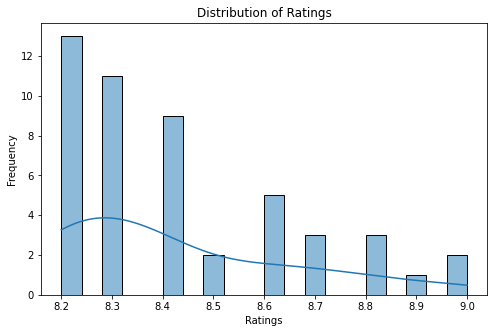

In [77]:
# Plot histogram for Ratings
plt.figure(figsize=(8, 5))
sns.histplot(df_movies['Ratings_x'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

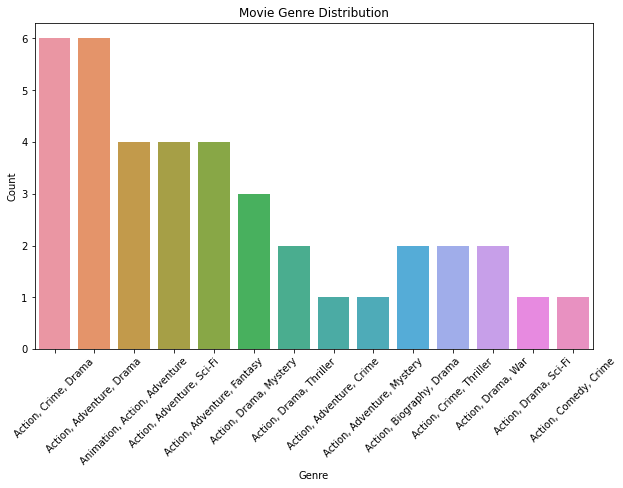

In [78]:
# Plot bar chart for Genre distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df_movies, x='Genre')
plt.title('Movie Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

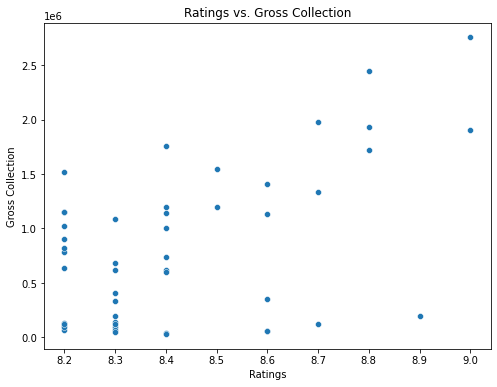

In [79]:
# Scatter plot of Ratings vs. Gross Collection
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_movies, x='Ratings_x', y='Gross Collection')
plt.title('Ratings vs. Gross Collection')
plt.xlabel('Ratings')
plt.ylabel('Gross Collection')
plt.show()

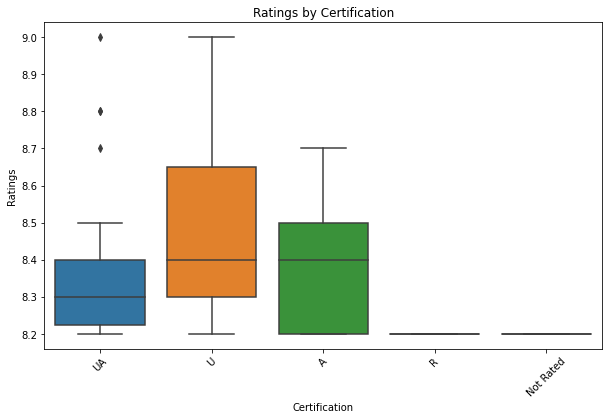

In [80]:
# Box plot of Ratings by Certification
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_movies, x='Certification', y='Ratings_x')
plt.title('Ratings by Certification')
plt.xlabel('Certification')
plt.ylabel('Ratings')
plt.xticks(rotation=45)
plt.show()

# Phase 4

In [81]:
# Calculate average ratings for each genre
average_ratings_by_genre = df_movies.groupby('Genre')['Ratings_x'].mean()
print(average_ratings_by_genre)

Genre
Action, Adventure, Crime        8.400000
Action, Adventure, Drama        8.633333
Action, Adventure, Fantasy      8.450000
Action, Adventure, Mystery      8.300000
Action, Adventure, Sci-Fi       8.450000
Action, Biography, Drama        8.300000
Action, Comedy, Crime           8.200000
Action, Crime, Drama            8.433333
Action, Crime, Thriller         8.250000
Action, Drama, Mystery          8.533333
Action, Drama, Sci-Fi           8.200000
Action, Drama, Thriller         8.300000
Action, Drama, War              8.200000
Animation, Action, Adventure    8.450000
Name: Ratings_x, dtype: float64


In [82]:
# Calculate the number of movies in each certification category
certification_counts = df_movies['Certification'].value_counts()
print(certification_counts)

UA           22
U            15
A             9
R             1
Not Rated     1
Name: Certification, dtype: int64


In [83]:
df_movies.isnull().sum()

Sno_x                0
Year_x               0
Ratings_x            0
Star                 0
Movie Name           0
Votes                0
Gross Collection     0
Genre               10
Popularity           0
Certification        1
dtype: int64

In [84]:
# If there are categorical variables, encode them into numerical format for modeling
# One common approach is one-hot encoding using the pandas get_dummies() function
encoded_df = pd.get_dummies(df_movies, columns=['Genre', 'Certification'], drop_first=True)
print(encoded_df.head())

   Sno_x  Year_x  Ratings_x  \
0      1    2008        9.0   
1      2    2003        9.0   
2      3    2023        8.9   
3      4    2010        8.8   
4      5    2001        8.8   

                                                Star  \
0  Christian Bale, Heath Ledger, Aaron Eckhart, M...   
1  Elijah Wood, Viggo Mortensen, Ian McKellen, Or...   
2  Kemp Powers, Justin K. Thompson, Shameik Moore...   
3  Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...   
4  Elijah Wood, Ian McKellen, Orlando Bloom, Sean...   

                                          Movie Name    Votes  \
0                                    The Dark Knight  2753685   
1      The Lord of the Rings: The Return of the King  1903996   
2                Spider-Man: Across the Spider-Verse   197616   
3                                          Inception  2444409   
4  The Lord of the Rings: The Fellowship of the Ring  1932265   

   Gross Collection  Popularity  Genre_Action, Adventure, Drama  \
0           275368

In [85]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Example of Min-Max Scaling
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(encoded_df[['Ratings_x', 'Votes', 'Gross Collection']]), columns=['Ratings_x', 'Votes', 'Gross Collection'])
print(scaled_df.head())

   Ratings_x     Votes  Gross Collection
0      1.000  1.000000          1.000000
1      1.000  0.687851          0.687851
2      0.875  0.060982          0.060982
3      0.750  0.886382          0.886382
4      0.750  0.698237          0.698237


In [86]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(encoded_df[['Ratings_x', 'Votes', 'Gross Collection']]), columns=['Ratings_x', 'Votes', 'Gross Collection_y'])
print(scaled_df.head())

   Ratings_x     Votes  Gross Collection_y
0   2.521016  2.782534            2.782534
1   2.521016  1.566949            1.566949
2   2.081408 -0.874238           -0.874238
3   1.641800  2.340076            2.340076
4   1.641800  1.607391            1.607391


In [87]:
from sklearn.model_selection import train_test_split


X = scaled_df.drop('Gross Collection_y', axis=1)  # Drop the target variable column (if applicable)
y = scaled_df['Gross Collection_y']  # Specify the target variable column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [89]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)


LinearRegression()

In [90]:
y_pred_linear = linear_reg.predict(X_test)

In [91]:
mse_linear = mean_squared_error(y_test, y_pred_linear)

In [92]:
r2_linear = r2_score(y_test, y_pred_linear)

In [93]:
print("Mean Squared Error (MSE) - Linear Regression:", mse_linear)

Mean Squared Error (MSE) - Linear Regression: 1.1347579232329595e-31


In [94]:
print("R-squared (R2) - Linear Regression:", r2_linear)

R-squared (R2) - Linear Regression: 1.0


In [95]:
decision_tree_reg = DecisionTreeRegressor(random_state=42)
decision_tree_reg.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_reg.predict(X_test)
mse_decision_tree = (y_test, y_pred_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)
print("Mean Squared Error (MSE) - Decision Tree Regression:", mse_decision_tree)


Mean Squared Error (MSE) - Decision Tree Regression: (13   -1.068630
45   -1.061771
47   -1.013810
44   -0.969959
17   -0.276823
27    0.397827
26   -0.176175
25   -0.274930
31   -1.017941
19    0.560666
Name: Gross Collection_y, dtype: float64, array([-1.06742642, -1.06388992, -1.00191675, -0.9752113 , -0.29360658,
        0.46540917, -0.25098688, -0.25098688, -1.00191675,  0.56079025]))


In [96]:
print("R-squared (R2) - Decision Tree Regression:", r2_decision_tree)

R-squared (R2) - Decision Tree Regression: 0.9967538304410758


In [97]:
random_forest_reg = RandomForestRegressor(random_state=42)
random_forest_reg.fit(X_train, y_train)
y_pred_random_forest = random_forest_reg.predict(X_test)
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)


print("Mean Squared Error (MSE) - Random Forest Regression:", mse_random_forest)


Mean Squared Error (MSE) - Random Forest Regression: 0.0007174128831888551


In [98]:
print("R-squared (R2) - Random Forest Regression:", r2_random_forest)

R-squared (R2) - Random Forest Regression: 0.997966236559245


In [99]:
# RandomForest Regression is the best  model as it has lowest Mean Squared Error (MSE) and the highest R-squared (R2) score, as they indicate better predictive performance.

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
# Define the hyperparameter grid for Random Forest Regression
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

In [102]:
# Initialize the Random Forest Regression model
random_forest_reg = RandomForestRegressor(random_state=42)

In [103]:
# Initialize Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=random_forest_reg, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

In [104]:
# Fit the Grid Search to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [105]:
# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_random_forest_model = grid_search.best_estimator_

In [106]:
# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [107]:
# Make predictions on the test set using the best model
y_pred_best = best_random_forest_model.predict(X_test)


In [108]:
y_pred_best

array([-1.07226368, -1.06676583, -0.98906116, -0.98281767, -0.27071489,
        0.45579523, -0.20442702, -0.2383172 , -0.99120322,  0.5244905 ])

In [109]:
# Evaluate the best model using MSE and R2
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

In [110]:
print("Mean Squared Error (MSE) - Best Random Forest Model:", mse_best)
print("R-squared (R2) - Best Random Forest Model:", r2_best)

Mean Squared Error (MSE) - Best Random Forest Model: 0.0008375851720524395
R-squared (R2) - Best Random Forest Model: 0.9976255652200348


# Saving Model

In [112]:
import joblib

# Save the best Random Forest model to a file
model_filename = 'best_random_forest_model.joblib'
joblib.dump(best_random_forest_model, model_filename)

print("Model saved successfully.")



Model saved successfully.


In [113]:
# Load the saved model back into memory
loaded_model = joblib.load(model_filename)


In [114]:
loaded_model


RandomForestRegressor(max_depth=5, n_estimators=50, random_state=42)